<a href="https://colab.research.google.com/github/rahiakela/edureka-deep-learning-with-tensorflow/blob/module-3-deep-dive-into-neural-networks-with-tensorFlow/module_3_perceptron_learning_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Learning Algorithm

As you know a perceptron serves as a basic building block for creating a deep neural network therefore, it is quite obvious that we should begin our journey of mastering Deep Learning with perceptron and learn how to implement it using TensorFlow to solve different problems. 

Following are the topics that will be covered in this blog on Perceptron Learning Algorithm:

* Perceptron as a Linear Classifier
* Implementation of a Perceptron using TensorFlow Library
* SONAR Data Classification Using a Single Layer Perceptron

## Types of Classification Problems

One can categorize all kinds of classification problems that can be solved using neural networks into two broad categories:
* Linearly Separable Problems
* Non-Linearly Separable Problems

Basically, a problem is said to be linearly separable if you can classify the data set into two categories or classes using a single line. For example, separating cats from a group of cats and dogs. On the contrary, in case of a non-linearly separable problems, the data set contains multiple classes and requires non-linear line for separating them into their respective classes. For example, classification of handwritten digits. Let us visualize the difference between the two by plotting the graph of a linearly separable problem and non-linearly problem data set:

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/07/Linear-528x264.jpg?raw=1' width='800'/>

Since, you all are familiar with AND Gates, I will be using it as an example to explain how a perceptron works as a linear classifier.

**Note**: As you move onto much more complex problems such as Image Recognition, which I covered briefly in the previous blog, the relationship in the data that you want to capture becomes highly non-linear and therefore, requires a network which consists of multiple artificial neurons, called as artificial neural network. 

## Perceptron as AND Gate

As you know that AND gate produces an output as 1 if both the inputs are 1 and 0 in all other cases. Therefore, a perceptron can be used as a separator or a decision line that divides the input set of AND Gate, into two classes:

* **Class 1**: Inputs having output as 0 that lies below the decision line.
* **Class 2**: Inputs having output as 1 that lies above the decision line or separator. 

The below diagram shows the above idea of classifying the inputs of AND Gate using a perceptron:

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/07/AND-Gate-Classifier-Deep-Learning-Tutorial-Edureka-528x194.png?raw=1' width='800'/>

Till now, you understood that a linear perceptron can be used to classify the input data set into two classes. But, how does it actually classify the data? 

Mathematically, one can represent a perceptron as a function of weights, inputs and bias (vertical offset):

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/06/Transfer-Function-Deep-Learning-Tutorial-Edureka-300x152.png?raw=1' width='800'/>

* Each of the input received by the perceptron has been weighted based on the amount of its contribution for obtaining the final output. 
* Bias allows us to shift the decision line so that it can best separate the inputs into two classes.

Enough of the theory, let us look at the first example of this blog on Perceptron Learning Algorithm where I will implement AND Gate using a perceptron from scratch. 

## Perceptron Learning Algorithm: Implementation of AND Gate

### 1. Import all the required library

In [0]:
import tensorflow as tf

### Define Vector Variables for Input and Output

Now, I will create variables for storing the input, output and bias for my perceptron:

In [0]:
# input1, input2 and bias
train_in = [
   [1., 1., 1],
   [1., 0, 1],
   [0, 1., 1],
   [0, 0, 1]         
]

# target
train_out = [[1.], [0], [0], [0]]

### 3. Define Weight Variable

Now, I need to define the weight variable and assign some random values to it initially. Since, I have three inputs over here (input 1, input 2 & bias), I will require 3 weight values for each input. So, I will define a tensor variable of shape 3×1 for our weights that will be initialized with random values:

In [0]:
# weight variable initialized with random values using random_normal()
w = tf.Variable(tf.random_normal([3, 1], seed=12))

### 4. Define placeholders for Input and Output

In TensorFlow, you can specify placeholders that can accept external inputs on the runtime. So, I will define two placeholders –  x for input and y for output. Later on, you will understand how to feed inputs to a placeholder.

In [0]:
# Placeholder for input and output
x = tf.placeholder(tf.float32, [None, 3])
y = tf.placeholder(tf.float32, [None, 1])

### 5. Calculate Output and Activation Function

As discussed earlier, the input received by a perceptron is first multiplied by the respective weights and then, all these weighted inputs are summed together. This summed value is then fed to activation for obtaining the final result as shown in the image below followed by the the code:

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/07/AND-Gate-Perceptron-Perceptron-Learning-Algorithm-Edureka-528x207.png?raw=1' width='800'/>

In [0]:
# calculate output
output = tf.nn.relu(tf.matmul(x, w))

### 6. Calculate the Cost or Error

Now, I need to calculate the error value w.r.t perceptron output and the desired output. Generally, this error is calculated as Mean Squared Error which is nothing but the square of difference of perceptron output and desired output as shown below:

In [0]:
# Mean Squared Loss or Error
loss = tf.reduce_sum(tf.square(output - y))

### 7. Minimize Error

TensorFlow provides optimizers that slowly change each variable (weight and bias) in order to minimize the loss in successive iterations. The simplest optimizer is gradient descent which I will be using in this case. 

In [0]:
# Minimize loss using GradientDescentOptimizer with a learning rate of 0.01
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

### 8. Initialize all the variables

Variables are not initialized when you call tf.Variable. So, I need to explicitly initialize all the variables in a TensorFlow program using the following code:

In [0]:
# Initialize all the global variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

### 9. Training Perceptron in Iterations

Now, I need to train our perceptron i.e. update values of weights and bias in successive iteration to minimize the error or loss. Here, I will train our perceptron in 1000 epochs.

In [0]:
# Compute output and cost w.r.t to input vector
for i in range(10):
  sess.run(train, {x: train_in, y: train_out})
  cost = sess.run(loss, feed_dict={x: train_in, y: train_out})
  print(f'Epoch-- {str(i)} -- loss -- {str(cost)}')

Epoch-- 0 -- loss -- 1.0213106
Epoch-- 1 -- loss -- 1.0033305
Epoch-- 2 -- loss -- 0.9856898
Epoch-- 3 -- loss -- 0.96837854
Epoch-- 4 -- loss -- 0.95138687
Epoch-- 5 -- loss -- 0.93470633
Epoch-- 6 -- loss -- 0.9183289
Epoch-- 7 -- loss -- 0.90224737
Epoch-- 8 -- loss -- 0.8864547
Epoch-- 9 -- loss -- 0.8709445


In  the above code, you can observe how I am feeding train_in (input set of AND Gate) and train_out (output set of AND gate) to placeholders x and y respectively using feed_dict for calculating the cost or error.

## Activation Functions

As discussed earlier, the activation function is applied to the output of a perceptron as shown in the image below:

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/06/Activation-Function-Deep-Learning-Tutorial-Edureka-300x121.png?raw=1' width='800'/>

In the previous example, I have shown you how to use a linear perceptron with relu activation function for performing linear classification on the input set of AND Gate. But, what if the classification that you wish to perform is non-linear in nature. In that case, you will be using one of the non-linear activation functions. Some of the prominent non-linear activation functions have been shown below:

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/06/Activation-Functions-Deep-Learning-Tutorial-Edureka-528x177.png?raw=1' width='800'/>

TensorFlow library provides built-in functions for applying activation functions. The built-in functions w.r.t. above stated activation functions are listed below:

* **tf.sigmoid(x, name=None)**
  * Computes sigmoid of x element-wise
  * For an element x, sigmoid is calculated as –  y = 1 / (1 + exp(-x))
* **tf.nn.relu(features, name=None)**
  * Computes rectified linear as – max(features, 0)
* **tf.tanh(x, name=None)**
  * Computes hyperbolic tangent of x element wise

So far, you have learned how a perceptron works and how you can program it using TensorFlow. So, it’s time to move ahead and apply our understanding of a perceptron to solve an interesting use case on SONAR Data Classification.

## SONAR Data Classification Using Single Layer Perceptrons

In this use case, I have been provided with a SONAR data set which contains the data about 208 patterns obtained by bouncing sonar signals off a metal cylinder (naval mine) and a rock at various angles and under various conditions. Now, as you know, a naval mine is a self-contained explosive device placed in water to damage or destroy surface ships or submarines. So, our goal is to build a model that can predict whether the object is a naval mine or rock based on our data set. 

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/07/SONAR-Use-Case-Single-Layer-Perceptron-Edureka-528x220.png?raw=1' width='800'/>

Now, let us have a look at our SONAR data set:

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/07/SONAR-Data-Set-Single-Layer-Perceptron-Edureka-4.png?raw=1' width='800'/>

Here, the overall fundamental procedure will be same as that of AND gate with few difference which will be discussed to avoid any confusion. Let me provide you a walk-through of all the steps to perform linear classification on SONAR data set using Single Layer Perceptron:

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/07/SONAR-Data-Use-Case-Work-Flow-Single-Layer-Perceptron-Edureka.png?raw=1' width='800'/>

Now that you have a good idea about all the steps involved in this use case, let us go ahead and program the model using TensorFlow:



### 1. Import all the required Libraries

At first, I will begin with all the required libraries as listed below:

* **matplotlib library**: It provides functions for plotting graph.
* **tensorflow library**: It provides functions for implementing Deep Learning Model. 
* **pandas, numpy and sklearn library**: It provides functions for pre-processing the data. 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Read and Pre-process the data set

In the previous example, I defined the input and the output variable w.r.t. AND Gate and explicitly assigned the required values to it. But, in real-life use cases like SONAR, you will be provided with the raw data set which you need to read and pre-process so that you can train your model around it.

* At first I will read the CSV file (input data set) using read_csv() function
* Then, I will segregate the feature columns (independent variables) and the output column (dependent variable) as X and y respectively
* The output column consists of string categorical values as ‘M’ and ‘R’, signifying Rock and Mine respectively. So, I will label them them as 0 and 1 w.r.t. ‘M’ and ‘R’
* After I have converted these categorical values into integer labels, I will apply one hot encoding using one_hot_encode() function that is discussed in the next step.

In [2]:
# Read the sonar dataset
df = pd.read_csv('sonar.csv')
df.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
# check how many columns?
len(df.columns)

61

In [4]:
# divide dataset into features and lables
X = df[df.columns[0:60]].values
y = df[df.columns[60]]
print(X.shape, y.shape)

(207, 60) (207,)


In [7]:
from sklearn.preprocessing import LabelEncoder

# encode the dependent variable as it has two categorical values
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y[:5]

array([1, 1, 1, 1, 1])

### Function for One Hot Encoder

One Hot Encoder adds extra columns based on number of labels present in the column. In this case, I have two labels 0 and 1 (for Rock and Mine). Therefore, two extra columns will be added corresponding to each categorical value as shown in the image below:

<img src='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/07/One-Hot-Encoder-Perceptron-Learning-Algorithm-Edureka-528x182.png?raw=1' width='800'/>

In [14]:
# function for applying one_hot_encoder
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels = len(np.unique(labels, ))
  one_hot_encode = np.zeros((n_labels, n_unique_labels))
  one_hot_encode[np.arange(n_labels), labels] = 1

  return one_hot_encode

Y = one_hot_encode(y)
Y[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### Dividing data set into Training and Test Subset

While working on any deep learning project, you need to divide your data set into two parts where one of the parts is used for training your deep learning model and the other is used for validating the model once it has been trained. Therefore, in this step I will also divide the data set into two subsets:

* **Training Subset**: It is used for training the model
* **Test Subset**: It is used for validating our trained model 

I will be use train_test_split() function from the sklearn library for dividing the dataset:

In [15]:
from sklearn.utils import  shuffle
from sklearn.model_selection import train_test_split


# Divide the data in training and test subset
X, Y = shuffle(X, Y, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=42)
print(train_x.shape)
print(train_y.shape)

(165, 60)
(165, 2)


### 5. Define Variables and Placeholders

Here, I will be define variables for following entities:

* **Learning Rate**: The amount by which the weight will be adjusted.
* **Training Epochs**: No. of iterations
* **Cost History**: An array that stores the cost values in successive epochs.
* **Weight**: Tensor variable for storing weight values
* **Bias**: Tensor variable for storing bias values

Apart from variable, I will also need placeholders that can take input. So, I will create place holder for my input and feed it with the data set later on. At last, I will call global_variable_initializer() to initialize all the variables. 

In [0]:
# define all the variables to work with the tensors
learning_rate = 0.1
training_epochs = 1000

cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
n_class = 2

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))

### 6. Calculate the Cost or Error

Similar to AND Gate implementation, I will calculate the cost or error produced by our model. Instead of Mean Squared Error, I will use cross entropy to calculate the error in this case. 

In [0]:
y_hat = tf.placeholder(tf.float32, [None, n_class])
y = tf.nn.softmax(tf.matmul(x, W) + b)

cost_function = tf.reduce_mean( - tf.reduce_sum((y_hat * tf.log(y)), reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

### 7. Training the Perceptron Model in Successive Epochs

Now, I will train my model in successive epochs. In each of the epochs, the cost is calculated and then, based on this cost the optimizer modifies the weight and bias variables in order to minimize the error. 

In [19]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

# Minimizing the cost for each epoch
for epoch in range(training_epochs):
  sess.run(training_step, feed_dict={x: train_x, y_hat: train_y})
  cost = sess.run(cost_function, feed_dict={x: train_x, y_hat: train_y})
  cost_history = np.append(cost_history, cost)
  print(f'epoch: {str(epoch)}  - cost: {str(cost)}')

epoch: 0  - cost: 0.6890586
epoch: 1  - cost: 0.6861614
epoch: 2  - cost: 0.68367136
epoch: 3  - cost: 0.6813467
epoch: 4  - cost: 0.6791113
epoch: 5  - cost: 0.6769402
epoch: 6  - cost: 0.6748241
epoch: 7  - cost: 0.6727587
epoch: 8  - cost: 0.67074114
epoch: 9  - cost: 0.6687693
epoch: 10  - cost: 0.6668413
epoch: 11  - cost: 0.6649552
epoch: 12  - cost: 0.6631094
epoch: 13  - cost: 0.6613022
epoch: 14  - cost: 0.65953195
epoch: 15  - cost: 0.65779734
epoch: 16  - cost: 0.6560968
epoch: 17  - cost: 0.6544292
epoch: 18  - cost: 0.6527932
epoch: 19  - cost: 0.6511875
epoch: 20  - cost: 0.6496111
epoch: 21  - cost: 0.64806294
epoch: 22  - cost: 0.6465418
epoch: 23  - cost: 0.64504665
epoch: 24  - cost: 0.6435769
epoch: 25  - cost: 0.6421313
epoch: 26  - cost: 0.6407093
epoch: 27  - cost: 0.63930976
epoch: 28  - cost: 0.63793224
epoch: 29  - cost: 0.6365758
epoch: 30  - cost: 0.63523984
epoch: 31  - cost: 0.6339236
epoch: 32  - cost: 0.6326266
epoch: 33  - cost: 0.6313482
epoch: 34  - co

### 8. Validation of the Model based on Test Subset

As discussed earlier, the accuracy of a trained model is calculated based on Test Subset. Therefore, at first, I will feed the test subset to my model and get the output (labels). Then, I will compare the output obtained from the model with that of the actual or desired output and finally, will calculate the accuracy as percentage of correct predictions out of total predictions made on test subset.

In [20]:
# Run the trained model on test subset
pred_y = sess.run(y, feed_dict={x: test_x})

# calculate the correct predictions
correct_prediction = tf.equal(tf.argmax(pred_y, 1), tf.argmax(test_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(f'Accuracy: {sess.run(accuracy)}')

Accuracy: 0.8333333134651184


As you can see, we got an accuracy of 83.34% which is descent enough. Now, let us observe how the cost or error has been reduced in successive epochs by plotting a graph of Cost vs No. of Epochs:

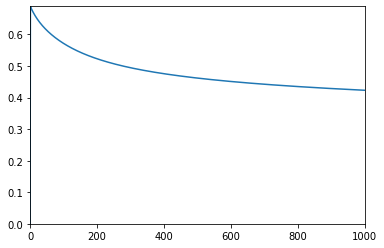

In [21]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

## Putting all together.

61
epoch :  0  -  cost:  0.6890586
epoch :  1  -  cost:  0.6861614
epoch :  2  -  cost:  0.68367136
epoch :  3  -  cost:  0.6813467
epoch :  4  -  cost:  0.6791113
epoch :  5  -  cost:  0.6769402
epoch :  6  -  cost:  0.6748241
epoch :  7  -  cost:  0.6727587
epoch :  8  -  cost:  0.67074114
epoch :  9  -  cost:  0.6687693
epoch :  10  -  cost:  0.6668413
epoch :  11  -  cost:  0.6649552
epoch :  12  -  cost:  0.6631094
epoch :  13  -  cost:  0.6613022
epoch :  14  -  cost:  0.65953195
epoch :  15  -  cost:  0.65779734
epoch :  16  -  cost:  0.6560968
epoch :  17  -  cost:  0.6544292
epoch :  18  -  cost:  0.6527932
epoch :  19  -  cost:  0.6511875
epoch :  20  -  cost:  0.6496111
epoch :  21  -  cost:  0.64806294
epoch :  22  -  cost:  0.6465418
epoch :  23  -  cost:  0.64504665
epoch :  24  -  cost:  0.6435769
epoch :  25  -  cost:  0.6421313
epoch :  26  -  cost:  0.6407093
epoch :  27  -  cost:  0.63930976
epoch :  28  -  cost:  0.63793224
epoch :  29  -  cost:  0.6365758
epoch :  

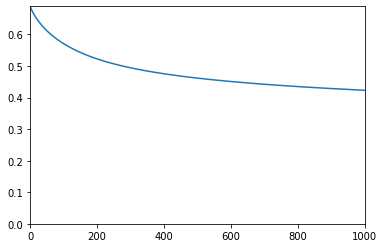

In [22]:
#define the one hot encode function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode
 
#Read the sonar dataset
df = pd.read_csv('sonar.csv')
print(len(df.columns))
X = df[df.columns[0:60]].values
y=df[df.columns[60]]

#encode the dependent variable containing categorical values
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)
 
#Transform the data in training and testing
X,Y = shuffle(X,Y,random_state=1)
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.20, random_state=42)
 
 
#define and initialize the variables to work with the tensors
learning_rate = 0.1
training_epochs = 1000
 
#Array to store cost obtained in each epoch
cost_history = np.empty(shape=[1],dtype=float)
 
n_dim = X.shape[1]
n_class = 2
 
x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
 
#initialize all variables.
init = tf.global_variables_initializer()
 
#define the cost function
y_ = tf.placeholder(tf.float32,[None,n_class])
y = tf.nn.softmax(tf.matmul(x, W)+ b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)),reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
#initialize the session
sess = tf.Session()
sess.run(init)
cost_history = []
 
#calculate the cost for each epoch
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost = sess.run(cost_function,feed_dict={x: train_x,y_: train_y})
    cost_history = np.append(cost_history, cost)
    print('epoch : ', epoch,  ' - ', 'cost: ', cost)
 
pred_y = sess.run(y, feed_dict={x: test_x})
 
#Calculate Accuracy
correct_prediction = tf.equal(tf.argmax(pred_y,1), tf.argmax(test_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(f'Accuracy:{sess.run(accuracy)}')
 
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

## Conclusion

In this blog on Perceptron Learning Algorithm, you learned what is a perceptron and how to implement it using TensorFlow library. You also understood how a perceptron can be used as a linear classifier and I demonstrated how to we can use this fact to implement AND Gate using a perceptron. At last, I took a one step ahead and applied perceptron to solve a real time use case where I classified SONAR data set to detect the difference between Rock and Mine. Now, in the next blog I will talk about limitations of a single layer perceptron and how you can form a multi-layer perceptron or a neural network to deal with more complex problems. There, you will also learn about how to build a multi-layer neural network using TensorFlow from scratch.